<a href="https://colab.research.google.com/github/KCW-colab/pytorch-example/blob/master/%EB%B0%91%EB%B0%94%EB%8B%A52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

행아웃 https://hangouts.google.com/call/H1BT80UlutUsEG3guXgpACEM

### 1장 - 신경망 복습

In [ ]:
import numpy as np
x = np.array([1, 2, 3])
x.__class__ # 클래스 이름 표시


numpy.ndarray

In [ ]:
x.shape

(3,)

In [ ]:
x.ndim

1

In [ ]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [ ]:
W.ndim

2

In [ ]:
W = np.array([[1, 2, 3,], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print(W + X)
print(W*X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [ ]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [ ]:
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [ ]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

 # 행렬의 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.matmul(A, B)

# 2차원 까지는 np.dot이나 matmul의 역할이 같음.

32


array([[19, 22],
       [43, 50]])

In [ ]:
import numpy as np
W1 = np.random.randn(2, 4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10, 2) # 입력
h = np.matmul(x, W1) + b1
print(h.shape)

(10, 4)


In [ ]:
def sigmoid(x):
  return 1 / ( 1+ np.exp(-x))


In [ ]:
a = sigmoid(h)

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2) 
W1 = np.random.randn(2, 4) 
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3) 
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2
print(s.shape)

(10, 3)


In [ ]:
import numpy as np
class Sigmoid:
  def __init__(self):
    self.params=[]

  def forward(self, x):
    return 1 / ( 1+ np.exp(-x))

class Affine:
  def __init__(self, W, b):
    self.params = [W, b]

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    return out

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = np.random.randn(I, H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H, O)
    b2 = np.random.randn(O)

    # 게층 생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]

    # 모든 가중치를 리스트에 모은다.
    self.params=[]
    for layer in self.layers:
      self.params += layer.params

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x


In [ ]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s.shape)

(10, 3)


In [ ]:
import numpy as np
D, N  = 8 , 7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파  # 원소 복제를 시행하는 numpy의 함수 (x 를 N번 복제하는데 세로방향으로 복제함.)
# y.shape = (7,8)
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims=True) # 역전파 # 2차원 유지를 위해 keepdims = True로 둠.

In [ ]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis = 0, keepdims = True) # 순전파
dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis=0) # 역전파
# Sum 노드와 repeat 노드는 반대관계임.
# ex) Sum 노드의 순전파 => repeat 노드의 역전파

In [ ]:
class MatMul:
  def __init__(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None
  
  def forward(self, x):
    W, = self.params
    out = np.matmul(x, W)
    self.x = x
    return out

  def backward(self, dout):
    W, = self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    self.grads[0][...] = dW
    return dx

In [ ]:
'''
얕은 복사는 본품의 메모리값을 복사하는 것임.
깊은 복사는 본품의 숫자 자체를 복사해오는 것

얕은 복사 종류
list1 = [1, 2, 3]
list2 = list1

깊은 복사 종류
list2 = list1[:]
list2 = list1.copy
'''


'\n얕은 복사는 본품의 메모리값을 복사하는 것임.\n깊은 복사는 본품의 숫자 자체를 복사해오는 것\n\n얕은 복사 종류\nlist1 = [1, 2, 3]\nlist2 = list1\n\n깊은 복사 종류\nlist2 = list1[:]\nlist2 = list1.copy\n'

In [ ]:
class Sigmoid:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return out

In [ ]:
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    self.x = x
    return out

  def backward(self, dout):
    W, b = self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    db = np.sum(dout, axis = 0)

    self.grads[0][...] = dW
    self.grads[1][...] = db
    return dx

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for i in range(len(params)):
      params[i] -= self.lr * grads[i]

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)


from dataset import spiral
import matplotlib.pyplot as plt

x,t = spiral.load_data()
print('x', x.shape) # (300, 2)
print('t', t.shape) # (300, 3)

'''
# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()
'''


x (300, 2)
t (300, 3)


"\n# 데이터점 플롯\nN = 100\nCLS_NUM = 3\nmarkers = ['o', 'x', '^']\nfor i in range(CLS_NUM):\n    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])\nplt.show()\n"

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = 0.01 * np.random.randn(I, H)
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H, O)
    b2 = np.zeros(0)

    # 계층 생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score, t)
    return loss


  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

|에폭 1| 반복 10 / 10 | 손실 1.13
|에폭 2| 반복 10 / 10 | 손실 1.13
|에폭 3| 반복 10 / 10 | 손실 1.12
|에폭 4| 반복 10 / 10 | 손실 1.12
|에폭 5| 반복 10 / 10 | 손실 1.11
|에폭 6| 반복 10 / 10 | 손실 1.14
|에폭 7| 반복 10 / 10 | 손실 1.16
|에폭 8| 반복 10 / 10 | 손실 1.11
|에폭 9| 반복 10 / 10 | 손실 1.12
|에폭 10| 반복 10 / 10 | 손실 1.13
|에폭 11| 반복 10 / 10 | 손실 1.12
|에폭 12| 반복 10 / 10 | 손실 1.11
|에폭 13| 반복 10 / 10 | 손실 1.09
|에폭 14| 반복 10 / 10 | 손실 1.08
|에폭 15| 반복 10 / 10 | 손실 1.04
|에폭 16| 반복 10 / 10 | 손실 1.03
|에폭 17| 반복 10 / 10 | 손실 0.96
|에폭 18| 반복 10 / 10 | 손실 0.92
|에폭 19| 반복 10 / 10 | 손실 0.92
|에폭 20| 반복 10 / 10 | 손실 0.87
|에폭 21| 반복 10 / 10 | 손실 0.85
|에폭 22| 반복 10 / 10 | 손실 0.82
|에폭 23| 반복 10 / 10 | 손실 0.79
|에폭 24| 반복 10 / 10 | 손실 0.78
|에폭 25| 반복 10 / 10 | 손실 0.82
|에폭 26| 반복 10 / 10 | 손실 0.78
|에폭 27| 반복 10 / 10 | 손실 0.76
|에폭 28| 반복 10 / 10 | 손실 0.76
|에폭 29| 반복 10 / 10 | 손실 0.78
|에폭 30| 반복 10 / 10 | 손실 0.75
|에폭 31| 반복 10 / 10 | 손실 0.78
|에폭 32| 반복 10 / 10 | 손실 0.77
|에폭 33| 반복 10 / 10 | 손실 0.77
|에폭 34| 반복 10 / 10 | 손실 0.78
|에폭 35| 반복 10 / 10 | 손실

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

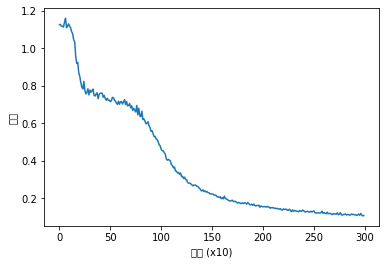

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch01")
sys.path.append(os.pardir)
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300 # 학습하는 에폭 수
batch_size = 30 # 미니배치 크기
hidden_size = 10 # 은닉층의 뉴런 수
learning_rate = 1.0 # 학습률


x, t = spiral.load_data()
# 데이터 읽기
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
# 신경망 모델 생성
optimizer = SGD(lr = learning_rate)
# SGD 모델 생성
# 에폭은 학습 단위로서, 1에폭은 학습 데이터를 모두 '살펴본' 시점.

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size  # // 연산자는 나눗셈 후 소숫점을 버리는 연산자.
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  # 데이터 뒤섞기
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters*batch_size:(iters+1)*batch_size]
    batch_t = t[iters*batch_size:(iters+1)*batch_size]

  # 기울기를 구해 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

  # 역전파 순전파를 이용해서 기울기들을 모두저장

    total_loss += loss
    loss_count += 1

  

  # 정기적으로 학습 경과 출력
    if (iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print('|에폭 %d| 반복 %d / %d | 손실 %.2f' %(epoch+1, iters+1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

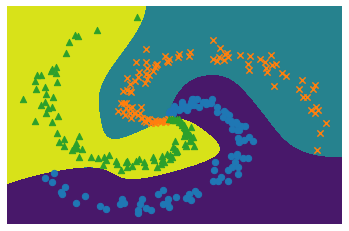

In [ ]:
# 경계 영역을 보면 나선형 패턴을 올바르게 파악했음을 알 수 있음

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X) 
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

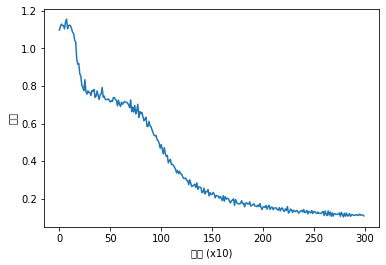

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr=learning_rate)

# 앞에 했던 내용을 간단하게 Trainer 라는 클래스로 묶었을 뿐임.
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval = 10)
trainer.plot()

In [ ]:
import numpy as np
a = np.random.randn(3)
print(a.dtype)
# 넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용함
# 그러나 신경망의 추론과 학습은 32비트에서도 문제없이 잘 작동하기 때문에
# 32비트로 떨어뜨려주는게 계산속도를 증가시키는데에 용이함.
b = np.random.randn(3).astype(np.float32)
print(b.dtype)
c = np.random.randn(3).astype('f')
print(c.dtype)
# np.float32 나 f로 지정하면 32비트로 변경
# 신경망 추론으로 한정하면 16비트를 사용해도 인식률이 거의 떨어지지 않음.
# 다만 일반적으로 CPU와 GPU는 연산자체를 32비트로 수행하기 때문에 
# 처리 속도 측면에서는 혜택이 없을 수도 있음.
# 그러나 학습된 가중치를 저장할 때는 16비트 부동소수점 수가 여전히 유효함. (데이터가 절반이므로)
# 그래서 이 책에서는 학습된 가중치를 저장하는 경우에 한해 16비트 부동소수점 수로 변환함.


float64
float32
float32


In [ ]:
'''
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
print(x)
'''
# 대량의 곱하기 연산은 병렬로 계산되는데 이 점에서는
# CPU 보다 GPU가 훨씬 유리함. 그래서 GPU 사용에 대해 설명
# 쿠파이는 GPU를 이용해 병렬 계산을 수행해 주는 라이브러리임.
# 쿠파이의 사용방법은 기본적으로 넘파이와 같음.
# 사용법은 같지만 뒤에서 열심히 GPU를 사용해 계산하는 것.
# 보통은 numpy를 cupy로 대체해주기만 하면 끝

"\nimport cupy as cp\nx = cp.arange(6).reshape(2, 3).astype('f')\nprint(x)\n"

### 2장 - 자연어와 단어의 분산 표현

In [ ]:
text = 'You say goodbye and I say hello.'
text = text.lower() # 모든 문자를 소문자로 변환
text = text.replace('.', ' .')  # (.) 을  ( .) 로 변환
text


'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ') # 공백을 기준으로 분할
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

print(id_to_word)
print(word_to_id)

print(id_to_word[1])
print(word_to_id['hello'])

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
say
5


In [ ]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
import numpy as np
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')
  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])


  return corpus, word_to_id, id_to_word 

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
def create_co_matrix(corpus, vocab_size, window_size = 1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus): # 순서가 있는 자료형에서 index 번호와 index 값을 반환함.    
  # 이 경우에서 corpus는 [0 1 2 3 4 1 5 6] 이므로 idx는 [0 1 2 3 4 5 6 7] word_id는 [0 1 2 3 4 1 5 6] 임.
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i
      # 제일 왼쪽 인덱스랑 오른쪽 인덱스의 왼쪽/ 오른쪽은 word의 len를 벗어나니까 그걸 방지하기 위해서 밑에 코드가 있음.

      if left_idx >= 0 :  
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx] # 여기서 corpus[] 는 value 값임.
        co_matrix[word_id, right_word_id] += 1
  return co_matrix

In [ ]:
'''
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2)) # x의 정규화
  ny = y / np.sqrt(np.sum(y**2)) # y의 정규화
  return np.dot(nx, ny)
'''
 # 위에서는 x나 y가 0일 때 분모에 문제가 생기므로 분모에 아주 작은 값을 더해주면 효율적인 계산이 가능함
def cos_similarity(x, y, eps=1e-8):
  nx = x / np.sqrt(np.sum(x**2) + eps) 
  ny = y / np.sqrt(np.sum(y**2) + eps) 
  return np.dot(nx, ny)


In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
from common.util import preprocess, create_co_matrix, cos_similarity
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # "you" 의 단어 벡터
c1 = C[word_to_id['i']] # "i" 의  단어 벡터
print(cos_similarity(c0, c1))

0.7071067691154799


In [ ]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
  # 검색어를 꺼낸다.
  if query not in word_to_id:
    print('%s(을)를 찾을 수 없습니다.' %query)
    return
  
  print('\n[query]' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)

  # 코사인 유사도를 기준으로 내림차순으로 출력
  count = 0
  for i in ( -1 * similarity).argsort(): # argsort의 의미는 배열의 원소를 오름차순으로 정렬하는 것. 그런데 여기서는 similarity 에 -1을 곱했으니 내림차순으로 바뀜.
    if id_to_word[i] == query:
      continue
    print(' %s: %s' %(id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

In [ ]:
corpus, word_to_id, id_to_word = preprocess(text)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C)


[query]you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [ ]:
# argsort()의 의미를 잘 생각해 볼 것.
x = np.array([100, -20, 2]) 
print(x.argsort()) # 오름차순 정렬
print((-x).argsort()) # 각 원소에 -1을 곱했으니 내림차순 정렬이 됨.

[1 2 0]
[0 2 1]


In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)

from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) 
# word to id {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6} 
# 단어들을 어떤 value로 표현해준다고 생각하면 쉬움.
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)

# 위의 코드는 기존 적어놨던 코드를 이용해서 구현했음.


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [ ]:
# 상호정보량
# x,y의 관련성에 대해 설명하는 내용인데 얼마나 많이 등장하느냐에 대한 확률로 표현함.
# 이것이 왜 중요하냐면, 예컨대 the, car, drive 사이의 양의 상호정보량에 대해 생각을 해보자.
# 분명히 car 앞에는 the가 많이 붙어있을 것임. 그러나 car는 the와 별로 관련이 없는 단어이고 오히려 drive와 관련이 큼.
# 예로, the가 1000번, car가 20번, drive가 10번 등장하는 말뭉치가 있다고 가정해봄.
# 이 때, the와 car가 동시에 등장하는 횟수는 10 , car와 drive가 동시에 등장하는 횟수는 5라고 생각해보자.
# 이러면 상호정보량은 당연히 car와 drive 사이에서의 값이 더 높음. 
# 왜냐면 the는 car가 아니어도 많이 나오기 때문. 즉 독립적으로 나오는 횟수를 고려하기 때문임.
# 근데 여기서, log 함수를 사용하기 때문에 log가 0에 가까워지면, 즉 x,y가 출현을 거의 안한다면 문제가 됨.
# 따라서 PPMI = max(0,PMI(x,y)) 로 양의 값으로 바꿔주면 계산에 아주 유용할 듯.

In [ ]:
# 단어 사이의 관련성을 0 이상의 실수로 나타내는 함수
# verbose는 진행상황 출력 여부를 결정하는 플래그
# 큰 말뭉치를 다룰 때 verbose= True 로 설정하면 중간중간 진행 상황을 알려줌.
def ppmi(C, verbose=False, eps = 1e-8):   
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shpae[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j]*S[i] + eps)) # log2는 밑이 2인 로그
      M[i, j] = max(0, pmi)

      if verbose:
        cnt += 1
        if cnt % (total // 100) == 0:
          print('%.1f%% 완료' %(100*cnt/total))
  return M

# 이 코드는 동시발생 행렬에 대해서만 PPMI 행렬을 구할 수 있도록 하고자 단순화 해서 구현했음.


In [ ]:
# 동시발생 행렬을 PPMI 행렬로 변환해보자.
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'* 50)
print('PPMI')
print(W)


동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [ ]:
# 차원감소
# PPMI 행렬에도 큰 문제가 있음. 말뭉치의 어휘 수가 10만 개라면 그 벡터의 차원 수도 똑같이 10만이 됨.
# 10만 차원의 벡터를 다룬다는 것은 그다지 현실적이지 않음.
# 행렬의 내용을 들여다보면 원소 대부분이 0인 것을 알 수 있음. 
# 벡터의 원소 대부분이 중요하지 않다는 뜻인데 그렇다면 '중요한 정보'는 최대한 유지하면서 차원을 줄이는게 핵심이 됨.
# 새로운 축을 도입하여 똑같은 데이터를 좌표축 하나만으로 표시한 그림 확인.
# 여기서 중요한 것은 가장 적합한 축을 찾아내는 일로, 1차원 값만으로도 데이터의 본질적인 차이를 구별할 수 있어야 함.
# 그 방법으로 SVD 방법을 사용함. 책을 확인하면 더 자세하게 나와있음.

In [ ]:
# SVD를 파이썬 코드로 살펴보자. 
# linalg 모듈이 제공하는 svd 메서드로 실행할 수 있음. linalg는 선형대수의 약어임.
import os, sys
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size = 1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

# 동시 발생 행렬을 만들어 PPMI 행렬로 변환한 다음 SVD를 적용시킴.

In [ ]:
print(C[0]) # 동시발생 행렬
print(W[0]) # PPMI 행렬
print(U[0]) # SVD
print(U[0, :2]) # 2차원 벡터로 줄이려면 단순히 처음의 두 원소를 꺼내면 됨.

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]
[0.341 0.   ]


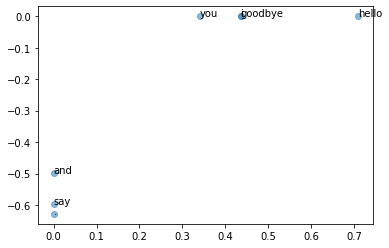

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

# plt.annotate(word,x,y) 메서드는 2차원 그래프상에서 좌표(x,y) 지점에 word에 담긴 텍스트를 그림.
# 그림을 보면 goodbye 와 hello, you, i 가 제법 가까이 있음을 알 수 있음.

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.chdir)

from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:' , len(corpus))
print('corpus[:30]', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])


말뭉치 크기: 929589
corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [ ]:
import sys
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size) 
# 윈도우 크기가 2면 타깃 단어 좌우 2단어씩을 맥락에 포함
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
  # truncated SVD( 빠르다! )
  from sklearn.utils.extmath import randomized_svd
  U, S, V = randomized_svd(W, n_components = wordvec_size, n_iter=5, random_state=None)

except ImportError:
  # SVD (느리다)
  U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size] # U의 행전체, 열은 100까지만. (차원축소 인듯.)
 
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)


동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산 ...

[query] you
 i: 0.6468660831451416
 we: 0.6108704805374146
 anybody: 0

## 3장 - word2vec

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7,3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[[ 1.04013674 -0.34643992  0.40698846]]


In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul

# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(s)

[[-0.93924377  0.83604034  1.75272435  0.98822214  3.16537359 -0.75249687
  -1.07426292]]


In [ ]:
import sys
sys.path.append('..')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
def create_contexts_target(corpus, window_size=1):
  target = corpus[window_size:-window_size]
  contexts = []

  for idx in range(window_size, len(corpus) - window_size):
    cs = []
    for t in range(-window_size, window_size + 1):
      if t == 0:
        continue
      cs.append(corpus[idx] + t)

    contexts.append(cs)
  
  return np.array(contexts), np.array(target)


In [ ]:
contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 5]
 [0 2]
 [4 6]]
[1 2 3 4 1 5]


In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
  def __init__(self, vocab_size, hidden_size):
    V, H = vocab_size, hidden_size

    # 가중치 초기화
    W_in = 0.01 * np.random.randn(V, H).astype('f')
    W_out = 0.01 * np.random.randn(V, H).astype('f')

    # 계층 생성
    self.in_layer0 = MatMul(W_in)
    self.in_layer1 = MatMul(W_in)
    self.out_layer = MatMul(W_out)
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    layers = [self.in_layer0, self.in_layer1, self.out_layer]
    self.params, self.grads = [], []
    for layer in layers:
      self.params += layer.params
      self.grads += layer.grads

    # 인스턴스 변수에 단어의 분산 표현을 저장한다.
    self.word_vecs = W_in

In [ ]:
 def forward(self, contexts, target):
   h0 = self.in_layer0.forward(contexts[:, 0])
   h1 = self.in_layer1.forward(contexts[:, 1])
   h = (h0 + h1) * 0.5
   score = self.out_layer.forward(h)
   loss = self.loss_layer.forward(score, traget)
   return loss


In [ ]:
def backward(self, dout=1):
  ds = self.loss_layer.backward(dout)
  da = self.out_layer.backward(ds)
  da *= 0.5
  self.in_layer1.backward(da)
  self.in_layer0.backward(da)
  return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

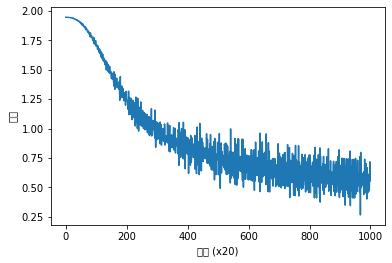

In [ ]:
import sys, os
sys.path.append('..')
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch03")
sys.path.append('..')
from simple_cbow import SimpleCBOW


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [ ]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
  print(word, word_vecs[word_id])

you [-0.6887224  1.1797768  1.1360782 -1.383061  -1.1102952]
say [ 1.1622263  -1.1165427  -1.1491416  -0.16698028  1.139369  ]
goodbye [-1.1734868   0.7112666   0.7624399  -0.62024933 -0.74520564]
and [ 0.8489317  -0.8212782  -0.79062176 -1.9364924   0.818058  ]
i [-1.1527313   0.6998706   0.7475278  -0.61636424 -0.7317284 ]
hello [-0.69144654  1.1967703   1.1260719  -1.3723357  -1.1221762 ]
. [ 1.1347976 -1.1420269 -1.176498   1.6596682  1.1989195]


## 4장 - word2vec 속도 개선

In [ ]:
import numpy as np
W = np.arange(21).reshape(7, 3)
W

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

In [ ]:
print(W[2]) ; W[5]

[6 7 8]


array([15, 16, 17])

In [ ]:
idx = np.array([1, 0, 3, 0])
W[idx]

array([[ 3,  4,  5],
       [ 0,  1,  2],
       [ 9, 10, 11],
       [ 0,  1,  2]])

In [ ]:
class Embedding:
  def __init__(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.idx = None

  def forward(self, idx):
    W, = self.params # , 가 뭔지 잘 모름
    self.idx = idx
    out = W[idx]
    return out

  def backward(self, dout):
    dW, = self.grads
    dW[...] = 0
    np.add.at(dW, self.idx, dout)
    return None


In [ ]:
# 나쁜예
'''
def backward(self, dout):
  dW, = self.grads
  dW[...] = 0  # dW 의 배열의 원소를 전부 0으로 만듬.
  dW[self.idx] = dout
  return None 
'''

'\ndef backward(self, dout):\n  dW, = self.grads\n  dW[...] = 0  # dW 의 배열의 원소를 전부 0으로 만듬.\n  dW[self.idx] = dout\n  return None \n'

In [ ]:
# 개선
def backward(self, dout):
  dW, = self.grads
  dW[...] = 0

  for i, word_id in enumerate(self.idx): # i에는 인덱스 , word_id 에는 실제 값이 할당됨.
    dW[word_id] += dout[i] # 왜 더하기인지는 각자 생각해보자.

  # 혹은
  # np.add.at(dW, self.idx, dout)
  # 일반적으로 파이썬에서 for 문보다는 넘파이의 내장 메서드를 사용하는 편이 더 빠르기에 효율을 높이려면 위 코드를 사용해야함.

  return

In [ ]:
class EmbeddingDot:
  def __init__(self, W):
    self.embed = Embedding(W)
    self.params = self.embed.params
    self.grads = self.embed.grads
    self.cache = None

  def forward(self, h, idx):
    target_W = self.embed.forward(idx) # 임베딩 한 행렬들 합침.
    out = np.sum(target_W * h, axis = 1) # 내적 계산

    self.cache = (h, target_W)
    return out

  def backward(self, dout):
    h, target_W = self.cache
    dout = dout.reshape(dout.shape[0], 1)

    dtarget_W = dout * h # + 방향으로 가는거
    self.embed.backward(dtarget_W) # 여기서는 사실 반환값이 없기 때문에 안봐도 될듯.
    dh = dout * target_W # 0.5방향으로 가는거
    return dh

In [ ]:
# 내적 계산의 구체적인 예
W = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13 ,14], [15, 16 ,17], [18, 19, 20]])
idx = np.array([0, 3 ,1])
h = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
embed = Embedding(W)
target_W = embed.forward(idx)
print(target_W)
out = np.sum(target_W * h, axis = 1) # 행 단위로
print()
print(out)

[[ 0  1  2]
 [ 9 10 11]
 [ 3  4  5]]

[  5 122  86]


In [ ]:
# 네거티브 샘플링에서 어떻게 부정적 예를 선택하는가?
# 임의로 뽑는 것 보다 좋은 방법이 있음. 그것은 출현 빈도가 높은 단어들을 많이, 낮은 단어들을 조금 추출하는 것.
# 그래서 통계분포를 이용해서 추출할 예정임.
import numpy as np

# 0에서 9까지의 숫자 중 하나를 무작위로 샘플링
print(np.random.choice(10))
print(np.random.choice(10))

# words에서 하나만 무작위로 샘플링
words = ['you', 'say', 'goodbye', 'I', 'hello', '.']
print(np.random.choice(words))

# 5개만 무작위로 샘플링(중복 있음)
print(np.random.choice(words, size = 5))

# 5개만 무작위로 샘플링(중복 없음)
print(np.random.choice(words, size=5, replace=False))

# 확률분포에 따라 샘플링
p = [0.5, 0.1, 0.05, 0.2, 0.05, 0.1]
np.random.choice(words, p=p)

2
6
say
['.' 'I' 'say' '.' 'say']
['.' 'hello' 'you' 'I' 'say']


'you'

In [ ]:
# 0.75 제곱을 하면서 출현 확률이 낮은 단어를 버리지 않기위함.
# 원래 확률이 낮은 단어의 확률을 살짝 높일 수 있음
p = [0.7, 0.29, 0.01]
new_p = np.power(p, 0.75) # 0.75 제곱
new_p /= np.sum(new_p) # 0.75 제곱한것들의 총합으로 나눠줌
print(new_p) # 결과값을 보면 출현 확률이 낮은 단어가 확률이 더 올라가고 높은 단어는 확률이 조금 내려감.

[0.64196878 0.33150408 0.02652714]


In [ ]:
import sys, os
import numpy as np
os.chdir('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch04')
sys.path.append(os.pardir)
from negative_sampling_layer import UnigramSampler
corpus = np.array([0, 1, 2, 3, 4, 1, 2, 3])
power = 0.75
sample_size = 2 # 네거티브 샘플링할 원소 갯수

sampler = UnigramSampler(corpus, power, sample_size) 
target = np.array([1, 3, 0]) # 긍정적인 예
negative_sample = sampler.get_negative_sample(target)
print(negative_sample)


# [1, 3, 0] 이 긍정적 예임.
# 여기서 1,2,3번째 행렬을 보면 긍정적 예와 겹치지 않는 행렬들이 나옴
# 1 =/= [0, 4]
# 2 =/= [4, 0]
# 3 =/= [4, 2]  답이 달라질 수도 있음. 따라서 네거티브 샘플링이 가능해짐.

[[0 4]
 [4 0]
 [4 2]]


In [ ]:
class NegativeSamplingLoss:
  def __init__(self, W, corpus, power = 0.75, sample_size = 5):
    # 가중치를 나타내는 W, 말뭉치를 뜻하는 corpus, 확률분포에 제곱할 값인 power, 부정적 예의 샘플링 횟수인 sample_size
    self.sample_size = sample_size
    self.sampler = UnigramSampler(corpus, power, sample_size)
    '''
    loss_layers와 embed_dot_layers에는 원하는 계층을 리스트로 보관함
    크기가 +1인 이유는 긍정적 예를 다루는 계층이 하나 더 필요학디 때문
    즉, loss_layer[0] , embed_dot_layers[0]이 긍정적 예를 다루는 계층임.
    '''
    self.loss_layers = [SigmoidWithLoss() for _ in range(sample_size + 1)] 
    self.embed_dot_layers = [EmbeddingDot(W) for _ in range(sample_size + 1)]
    self.params, self.grads =[], []
    for layer in self.embed_dot_layers:
      self.params += layer.params
      self.grads += layer.grads
  
  # 순전파
  def forward(self, h, target):
    batch_size = target.shape[0]
    negative_sample = self.sampler.get_negative_sample(target)

    # 긍정적 예 순전파
    score = self.embed_dot_layers[0].forward(h, target)
    correct_label = np.ones(batch_size, dtype=np.int32)
    loss = self.loss_layers[0].forward(score, correct_label)

    # 부정적 예 순전파
    negative_label = np.zeros(batch_size, dtype=np.int32)
    for i in range(self.sample_size):
        negative_target = negative_sample[:, i]
        score = self.embed_dot_layers[1 + i].forward(h, negative_target)
        loss += self.loss_layers[1 + i].forward(score, negative_label)

    return loss

  def backward(self, dout=1):
    dh = 0
    for l0, l1 in zip(self.loss_layers, self.embed_dot_layers):
        dscore = l0.backward(dout)
        dh += l1.backward(dscore)

    return dh


In [ ]:
import sys, os
os.chdir('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master')
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Embedding
from ch04.negative_sampling_layer import NegativeSamplingLoss


class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')

        # 계층 생성
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)  # Embedding 계층 사용
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)

        # 모든 가중치와 기울기를 배열에 모은다.
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss

    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout) # layer = Embedding(W_in)
        return None


In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
from common.util import most_similar, analogy
import pickle



pkl_file = '/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch04/cbow_params.pkl'
# pkl_file = 'skipgram_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)



[query] you
 we: 0.6103515625
 someone: 0.59130859375
 i: 0.55419921875
 something: 0.48974609375
 anyone: 0.47314453125

[query] year
 month: 0.71875
 week: 0.65234375
 spring: 0.62744140625
 summer: 0.6259765625
 decade: 0.603515625

[query] car
 luxury: 0.497314453125
 arabia: 0.47802734375
 auto: 0.47119140625
 disk-drive: 0.450927734375
 travel: 0.4091796875

[query] toyota
 ford: 0.55078125
 instrumentation: 0.509765625
 mazda: 0.49365234375
 bethlehem: 0.47509765625
 nissan: 0.474853515625
--------------------------------------------------

[analogy] king:man = queen:?
 woman: 5.16015625
 veto: 4.9296875
 ounce: 4.69140625
 earthquake: 4.6328125
 successor: 4.609375

[analogy] take:took = go:?
 went: 4.55078125
 points: 4.25
 began: 4.09375
 comes: 3.98046875
 oct.: 3.90625

[analogy] car:cars = child:?
 children: 5.21875
 average: 4.7265625
 yield: 4.20703125
 cattle: 4.1875
 priced: 4.1796875

[analogy] good:better = bad:?
 more: 6.6484375
 less: 6.0625
 rather: 5.21875
 slow

CBOW 모델은 실행이 안되는 관계로 생략.

## 5장 - 순환 신경망(RNN)

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()


In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()


In [ ]:
'''
퍼플렉서티는 확률의 역수이기 때문에 값이 작을수록 좋음. (최솟값 1.0)
퍼플렉서티의 값은 어떻게 해석되는가? => 분기 수 개념으로 해석
예) 분기 수 = 1.25 ==> 다음에 출현할 수 있는 단어의 후보가 1.25개
e^(L) L은 교차 엔트로피 오차의 출력.
'''

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 405.12
| 에폭 2 | 퍼플렉서티 308.23
| 에폭 3 | 퍼플렉서티 237.76
| 에폭 4 | 퍼플렉서티 223.79
| 에폭 5 | 퍼플렉서티 210.88
| 에폭 6 | 퍼플렉서티 205.67
| 에폭 7 | 퍼플렉서티 200.95
| 에폭 8 | 퍼플렉서티 198.14
| 에폭 9 | 퍼플렉서티 193.28
| 에폭 10 | 퍼플렉서티 193.72
| 에폭 11 | 퍼플렉서티 189.06
| 에폭 12 | 퍼플렉서티 192.47
| 에폭 13 | 퍼플렉서티 190.19
| 에폭 14 | 퍼플렉서티 190.32
| 에폭 15 | 퍼플렉서티 189.12
| 에폭 16 | 퍼플렉서티 185.17
| 에폭 17 | 퍼플렉서티 183.49
| 에폭 18 | 퍼플렉서티 180.30
| 에폭 19 | 퍼플렉서티 180.65
| 에폭 20 | 퍼플렉서티 181.25
| 에폭 21 | 퍼플렉서티 178.86
| 에폭 22 | 퍼플렉서티 174.80
| 에폭 23 | 퍼플렉서티 171.92
| 에폭 24 | 퍼플렉서티 172.81
| 에폭 25 | 퍼플렉서티 169.59
| 에폭 26 | 퍼플렉서티 168.00
| 에폭 27 | 퍼플렉서티 162.61
| 에폭 28 | 퍼플렉서티 159.80
| 에폭 29 | 퍼플렉서티 160.21
| 에폭 30 | 퍼플렉서티 151.77
| 에폭 31 | 퍼플렉서티 150.76
| 에폭 32 | 퍼플렉서티 146.29
| 에폭 33 | 퍼플렉서티 143.97
| 에폭 34 | 퍼플렉서티 140.15
| 에폭 35 | 퍼플렉서티 138.33
| 에폭 36 | 퍼플렉서티 132.47
| 에폭 37 | 퍼플렉서티 127.35
| 에폭 38 | 퍼플렉서티 126.24
| 에폭 39 | 퍼플렉서티 117.49
| 에폭 40 | 퍼플렉서티 114.00
| 에폭 41 | 퍼플렉서티 115.12
| 에폭 42 | 퍼플렉서티 106.97
| 에폭 43 | 퍼플렉서티 102

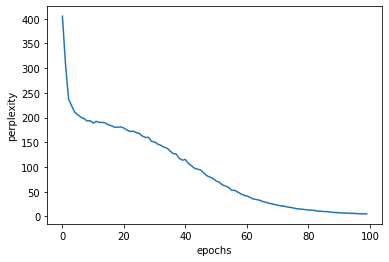

In [ ]:
# coding: utf-8
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


# 6장 - 게이트가 추가된 RNN

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_

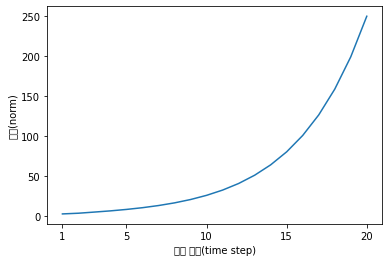

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2 # 미니배치 크기
H = 3 # 은닉 상태 벡터의 차원 수
T = 20 # 시계열 데이터의 길이

dh = np.ones((N, H)) # 모든 원소가 1인 행렬을 반환
np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정
Wh = np.random.randn(H, H)

norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2)) / N
  norm_list.append(norm)

plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_

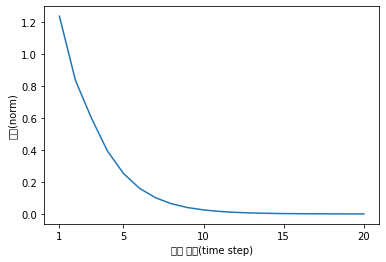

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2 # 미니배치 크기
H = 3 # 은닉 상태 벡터의 차원 수
T = 20 # 시계열 데이터의 길이

dh = np.ones((N, H)) # 모든 원소가 1인 행렬을 반환
np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정
Wh = np.random.randn(H, H) * 0.5

norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2)) / N
  norm_list.append(norm)

plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

In [ ]:
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0

def clip_grads(grads, max_norm):
  total_norm = 0
  for grad in grads:
    total_norm += np.sum(grad**2)
  total_norm = np.sqrt(total_norm)

  rate = max_norm / (total_norm + 1e-6)
  if rate < 1:
    for grad in grads:
      grad *= rate



print('before:', dW1)
clip_grads(grads, max_norm)
print('after:', dW1)



before: [[8.33687884 8.72179508 0.92131592]
 [2.15949471 8.3176109  8.48303897]
 [3.14652999 2.79294597 4.30815022]]
after: [[1.59398002 1.66757456 0.17615215]
 [0.4128873  1.59029606 1.62192529]
 [0.60160475 0.53400081 0.82370219]]


In [ ]:
class LSTM:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev, c_prev):
    Wx, Wh, b = self.params
    N, H = h_prev.shape

    A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b

    # slice
    f = A[:, :H]
    g = A[:, H:2*H]
    i = A[:, 2*H:3*H]
    o = A[:, 3*H:]

    f = sigmoid(f)
    g = np.tanh(g)
    i = sigmoid(i)
    o = sigmoid(o)

    c_next = f * c_prev + g * i
    h_next = o * np.tanh(c_next)

    self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
    return h_next, c_next


'''
slice 노드의 역전파 
dA = np.hstack((df, dg, di, do)) 가로로 연결한 합.
slice 노드는 한 개를 여러개로 나눠주는 것이기 때문에 다시 다 더해주는게 끝임.

'''

'\nslice 노드의 역전파 \ndA = np.hstack((df, dg, di, do)) 가로로 연결한 합.\nslice 노드는 한 개를 여러개로 나눠주는 것이기 때문에 다시 다 더해주는게 끝임.\n\n'

In [ ]:
class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None

In [ ]:
# coding: utf-8
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel

# BaseModel 클래스에는 params() 와 load_params() 메서드가 구현되어 있음.
class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()


In [ ]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.np import *
from common.base_model import BaseModel

class BetterRnnlm(BaseModel):
  def __init__(self, vocab_size =10000, wordvec_size = 650, hidden_size=  650, dropout_ratio = 0.5):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V,D) / 100).astype('f')
    lstm_Wx1 = (rn(D, 4 * H) / np.sqrt*(D)).astype('f')
    lstm_Wh1 = (rn(H, 4 * H) / np.sqrt*(H)).astype('f')
    lstm_b1 = np.zeros(4 * H).astype('f')
    lstm_Wx2 = (rn(H, 4 * H) / np.sqrt*(H)).astype('f')
    lstm_Wh2 = (rn(H, 4 * H) / np.sqrt*(H)).astype('f')
    lstm_b2 = np.zeros(4 * H).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 세 가지 개선!
    self.layers = [
                   TimeEmbedding(embed_W),
                   TimeDropout(dropout_ratio),
                   TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful = True),
                   TimeDropout(dropout_ratio),
                   TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful = True),
                   TimeDropout(dropout_ratio),
                   TimeAffine(embed_W.T, affine_b) # 가중치 공유!!
                
    ]

    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layers = [self.layers[2], self.layers[4]]
    self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

    def predict(self, xs, train_flg = False):
      for layer in self.drop_layers:
        layer.train_flg = train_flg
      for layer in self.layers:
        xs = layer.forward(xs)
      return xs

    def forward(self, xs, ts, train_flg = True):
      score = self.predict(xs, train_flg)
      loss = self.loss_layer.forward(score, ts)
      return loss

    def backward(self ,dout = 1):
      dout = self.loss_layer.backward(dout)
      for layer in reversed(self.layers):
        dout = layer.backward(dout)
      return dout
    
    def reset_state(self):
      for layer in self.lstm_layers:
        layer.reset_state()


In [ ]:
# coding: utf-8
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch06")
sys.path.append('..')
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ==============================================
# config.GPU = True
# ==============================================
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity, to_gpu
from dataset import ptb
from better_rnnlm import BetterRnnlm


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

if config.GPU:
    corpus = to_gpu(corpus)
    corpus_val = to_gpu(corpus_val)
    corpus_test = to_gpu(corpus_test)

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
                time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 퍼플렉서티: ', ppl)

    if best_ppl > ppl:
        best_ppl = ppl
        model.save_params()
    else:
        lr /= 4.0
        optimizer.lr = lr

    model.reset_state()
    print('-' * 50)


# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)


Done
Done
| 에폭 1 |  반복 1 / 1327 | 시간 5[s] | 퍼플렉서티 10000.17
| 에폭 1 |  반복 21 / 1327 | 시간 79[s] | 퍼플렉서티 4646.49


KeyboardInterrupt: ignored

# 7장 - RNN을 사용한 문장 생성

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm):
  def generate(self, start_id, skip_ids = None, sample_size=100):
    word_ids = [start_id]

    x = start_id
    while len(word_ids) < sample_size:
      x = np.array(x).reshape(1, 1)
      score = self.predict(x)
      p = softmax(score.flatten())

      sampled = np.random.choice(len(p), size=1, p=p)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))

    return word_ids
      

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch07")

sys.path.append('..')

from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()

model.load_params('../ch06/Rnnlm.pkl')
# 미리 학습한 가중치 매개변수

# 시작(start) 문자와 건너뜀(skip) 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you threatened any trying without managed threatening to return but they will fine noranda branch for us he ca n't help have any other.
 in the sell repayment of it has long been resumed and early encourage bidding from the customers of the future.
 there will be offered to be pulled.
 in the industry 's great beauty sector night in los angeles ii which has joint chips citing prime time possibly succeed.
 thus often do they need to not worry what they are often pressured to harvard cars from kidder making at a comeback meeting the


In [ ]:
' '.join(['you', 'say', 'goodbye'])

'you say goodbye'

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
from common.np import *
from rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('../ch07/BetterRnnlm.pkl')
'''
# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)
'''

model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print('-' * 50)
print(txt)


--------------------------------------------------
the meaning of life is n't a including widespread when new york city for art announced the plan using control of the company.
 at this point the proposed purchase for a sale of the company was priced at least an anticipated amount.
 sales said nasa approached the new financing that in an investment rating had expired.
 capital funding group structure plc asked shareholders to pay bulk fees for the first six months of the year.
 the paper and space company said it will continue negotiations with the company with the new hardware and hewlett-packard company to buy realist in addition


In [ ]:
import sys
sys.path.append('..')
from dataset import sequence

(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed = 1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

print(x_train[0])

print(t_train[0])

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

# x_train[0]
id_to_char[5]
char_to_id['+']

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


2

In [ ]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        # stateful = False => Time LSTM 계층이 상태를 유지하지 않기 때문.
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]

    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

    

In [ ]:
class Decoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V,D) / 100).astype('f')
    lstm_Wx = (rn(D, 4 * H) / np.sqrt*(D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt*(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
    self.affine = TimeAffine(affine_W, affine_b)

    self.params, self.grads= [], []

    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads

  def forward(self, xs, h):
    self.lstm.set_state(h)

    out = self.embed.forward(xs)
    out = self.lstm.forward(out)
    score = self.affine.forward(out)

    return score

  def backward(self, dscore):
    dout = self.affine.backward(dscore)
    dout = self.lstm.backward(dscore)
    dout = self.embed.backward(dscore)
    dh = self.lstm.dh
    return dh

  def generate(self, h, start_id, sample_size):
    sampled = []
    sample_id = start_id
    self.lstm.set_state(h)

    for _ in range(sample_size):
      x = np.array(sample_id).reshape((1, 1))
      out = self.embed.forward(x)
      out = self.lstm.forward(out)
      score = self.affine.forward(out)

      sample_id = np.argmax(score.flatten())
      sampled.append(int(sample_id))

    return sampled



In [ ]:
class Seq2seq(BaseModel):
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    self.encoder = Encoder(V, D, H)
    self.decoder = Decoder(V, D, H)
    self.softmax = TimeSoftmaxWithLoss()

    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.grads + self.decoder.grads 


  def forward(self, xs, ts):
    decoder_xs, decoder_ts  = ts[:, :-1], ts[:, 1:]
    h = self.encoder.forward(xs)
    score = self.decoder.forward(decoder_xs, h)
    loss = self.softmax.forward(score, decoder_ts)
    return loss

  def backward(self, dout=1):
    dout = self.softmax.backward(dout)
    dh = self.decoder.backward(dout)
    dout = self.encoder.backward(dh)
    return dout

  def generate(self, xs, start_id, sample_size):
    h = self.encoder.generate(h, start_id, sample_size)
    return sampled


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master')
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch07')
import numpy as np
import matplotlib.pyplot as plt

from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]  # 배열의 행을 반전시키면 정답률이 매우 높아짐.
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size=  len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 생성

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train ,t_train, max_epoch = 1, batch_size = batch_size, max_grad = max_grad)

  correct_num = 0 
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('검증 정확도 %.3f%%' %(acc*100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 4[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 8[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 11[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 12[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 13[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 15[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 16[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 20[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 22[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 23[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+285
T 666 
☒ 1001
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1001
---
Q 752+006
T 857 
☒ 1000
---
Q 292+167
T 1053
☒ 1000
---
Q 795+038
T 1427
☒ 1000
--

In [ ]:
# 엿보기(Peeky)
# coding: utf-8
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master')
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch07')
from common.time_layers import *
from seq2seq import Seq2seq, Encoder


class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads


In [ ]:
hidden_size = 128
wordvec_size = 16
vocab_size = len(char_to_id)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master')
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch07')
import numpy as np
import matplotlib.pyplot as plt

from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]  # 배열의 행을 반전시키면 정답률이 매우 높아짐.
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size=  len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 생성

model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train ,t_train, max_epoch = 1, batch_size = batch_size, max_grad = max_grad)

  correct_num = 0 
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('검증 정확도 %.3f%%' %(acc*100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 4[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 8[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 12[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 13[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 16[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 17[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 20[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 22[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 23[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  48+285
T 666 
☒ 102 
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1023
---
Q 752+006
T 857 
☒ 1023
---
Q 292+167
T 1053
☒ 1023
---
Q 795+038
T 1427
☒ 1111
--

Peeky 기법의 요약
seq2seq의 encoder 동작은 고정길이 벡터 h로 변환하는데 이때 h안에는 decoder에게 필요한 정보가 담겨있음
그러나 seq2seq는 최초 시각의 lstm(그림참조) 만이 벡터를 이용하고 있기 때문에
 이 중요한 정보인 h를 더 활용하기위해 전체 lstm과 전체 affine 계층에 값을 분배해주어서
계산할 때 concat 형태로 값을 더 추가해줌.
코드 보면 326쪽 세 줄 보면 알 수 있음.(hs, out 확인)
 따라서 seq2seq의 개선 2가지 방법인 reverse, peeky를 이용해서 정답률을 매우 높일 수 있음.


# 8장 - 어텐션

-seq2seq의 문제점 

```
encoder의 출력이 '고정 길이의 벡터' 인데 사실
여기서 고정 길이가 문제임. 예로, 아무리 긴 문장이 입력되더라도 항상 똑같은 길이의 벡터에 밀어 넣어야함.

```




지금까지 우리는 LSTM 계층의 마지막 은닉 상태만을 Decoder에 전달했다. 

그러나 Encoder 출력의 길이는 입력 문장의 길이에 따라 바꿔주는게 좋음.
이 점이 Encoder의 개선 포인트


시각별 LSTM계층의 은닉 상태에는 직전에 입력된 단어에 대한 정보가 많이 포함되어있음.

**Decoder 개선 1**



```
앞의 Decoder는 Encoder의 LSTM 계층의 마지막 은닉 상태만을 이용함. 
이 Encoder의 출력 전부를 활용할 수 있도록 Decoder를 개선해야함.

+

입력과 출력의 여러 단어 중 어떤 단어끼리 서로 관련되어 있는가 라는 대응관계를 seq2seq에 학습시킬 수는 없을까?


```


앞으로의 목표는 '도착어 단어'와 대응 관계에 있는 '출발어 단어'의 정보를 골라내는 것, 그리고 그 정보를 이용하여 번역을 수행하는 것이 됨. 

다시 말해서, 필요한 정보에만 주목하여 그 정보로부터 시계열 변환을 수행하는 것이 목표.

이 구조를 **어텐션**이라고 함.

그림 8-6

```
각 시각에서 Decoder에 입력된 단어와 대응관계인 단어의 벡터를 hs에서 골라냄.
예컨데 Decoder가 "I"를 출력할 때, hs에서 "나"에 대응하는 벡터를 선택하면 됨.
그리고 이러한 선택작업을 어떤 계산으로 해내겠다는 것.
하지만 여기서 문제는 선택하는 작업은 미분 불가능하다는 점.
미분이 불가능 하다는 것은 오차역전파법을 사용할 수 없다는 뜻.
그러면 선택하는 작업을 미분 가능한 연산으로 대체할 수는 없을까?
이건 아주 단순함. 모든 것을 선택하고 각 단어의 중요도를 나타내는 '가중치'를 별도록 계산하도록 함.

```



In [ ]:
# Encoder가 출력하는 hs와 각 단어의 가중치 a를 적당하게 작성하고
# 그 가중합을 구하는 구현을 볼 수 있음. 다차원 배열의 형상에 주의

import numpy as np

T, H = 5,4
hs = np.random.randn(T, H)
a = np.array([0.8, 0.1, 0.03, 0.05, 0.02])
print(hs)
# (5, 4) matrix
print()

ar = a.reshape(5, 1).repeat(4, axis = 1) # 인덱스가 1인 축이 복사됨.
# (5, ) 인 a를 reshpae 를 통해 (5, 1)로 만들어 주었고, 
# 이 때, 인덱스가 1인 축은 1이기 때문에 얘를 4로 만들어서 (5, 4)가 됨.
print(ar)
# (5, 4) matrix
print()

t = hs *ar # 는 원소별 곱임.
print(t)
# (5, 4) matrix
print()

c = np.sum(t, axis = 0) # 0번 째 축을 사라지게 했으므로 (4, )인 행렬(벡터)가 됨. 
print(c)
# (4,) matrix

[[-0.32324532  0.56055382 -1.78052958  0.17092869]
 [ 0.10126337 -0.64188376 -0.68944941 -0.67340752]
 [-0.486619   -0.91728497 -0.26664458 -0.44066177]
 [ 2.96765858  1.36507741 -0.67282477 -0.27457303]
 [ 0.33064809  1.43003607  1.09433449 -2.04925985]]

[[0.8  0.8  0.8  0.8 ]
 [0.1  0.1  0.1  0.1 ]
 [0.03 0.03 0.03 0.03]
 [0.05 0.05 0.05 0.05]
 [0.02 0.02 0.02 0.02]]

[[-0.25859626  0.44844306 -1.42442366  0.13674295]
 [ 0.01012634 -0.06418838 -0.06894494 -0.06734075]
 [-0.01459857 -0.02751855 -0.00799934 -0.01321985]
 [ 0.14838293  0.06825387 -0.03364124 -0.01372865]
 [ 0.00661296  0.02860072  0.02188669 -0.0409852 ]]

[-1.08072599e-01  4.53590722e-01 -1.51312249e+00  1.46849978e-03]


In [ ]:
# 미니배치 처리용 가중합을 구현
N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)
a = np.random.randn(N, T)
ar = a.reshape(N, T, 1).repeat(H, axis = 2) # (N, T, H)
# ar = a.reshape(N, T, 1) # 브로드캐스트를 사용하는 경우

t = hs * ar
print(t.shape)
print()

c = np.sum(t, axis = 1)
print(c)

(10, 5, 4)

[[-0.97017467 -0.12536326 -2.21145688 -0.82885679]
 [-3.2887129  -0.73763362  1.5216417   3.69981184]
 [-0.43066919 -0.97167624  1.88205878 -2.06787287]
 [-2.11867124  0.35151809 -0.1731855  -0.13746932]
 [ 0.51858182 -0.46345075  0.78704953 -1.24007048]
 [-1.23538548  0.55757632  3.5650881   1.63020288]
 [ 0.61038181  4.20620317  1.24454928 -1.80313437]
 [ 0.50495739  1.52402914 -1.08304405 -0.40176934]
 [ 2.34232631  1.81122343  3.52361982 -0.25108729]
 [ 4.78246371  4.50810305  0.84944852 -0.47229628]]


In [ ]:
# 역전파도 살펴 보겠음.
# sum의 역전파는 repeat 이고, repeat의 역전파는 sum임.


class WeightSum:
  def __init__(self):
    self.params, self.grads = [], []
    self.cache = None

  def forward(self, hs, a):
    N, T, H = hs.shape

    ar = a.reshape(N, T, 1).repeat(H, axis = 2)
    t = hs * ar
    c = np.sum(t, axis = 1)

    self.cache = (hs, ar)
    return c

  def backward(self, dc):
    hs, ar = self.cache
    N, T, H = hs.shape

    # 그림 8-11 확인하면 이해하기 더 쉬움.
    dt = dc.reshape(N, 1, H).repeat(T, axis = 1) # sum의 역전파
    dar = dt * hs # ar 쪽으로 가는 기울기
    dhs = dt * ar # hs 쪽으로 가는 기울기
    da = np.sum(dar, axis = 2) # repeat의 역전파

    return dhs, da

이것이 맥락벡터를 구하는 Weight Sum 계층의 구현임.
이 계층은 학습하는 매개변수가 없으므로, 이 책의 구현 규칙에 따라 self.params = []로 설정.


**Decoder 개선 2**

각 단어의 중요도를 나타내는 가중치 a가 있다면, 가중합을 이용해 '맥락 벡터'를 얻을 수 있다.

근데 이 a는 어떻게 구해야하는가?

당연히 데이터로부터 자동으로 학습할 수 있도록 준비해야하겠다.(딥러닝 특징)



각 단어의 가중치 a를 구하는 방법을 살펴보자.

 우선 Decoder의 첫 번째 LSTM 계층이 은닉 상태 벡터를 출력할 때까지의 처리부터 알아봐야한다.



```
Decoder의 LSTM 계층의 은닉 상태 벡터를 h라 하자.

지금 목표는 hs(Encoder의 출력 결과)의 각 단어 벡터와 h가 얼마나 '비슷한가'를 수치로 나타내는 것이다.

이 때 계산 방법은 가장 단순한 방법인 벡터의 '내적'을 이용하자.

내적의 직관적인 의미는 '두 벡터가 얼마나 같은 방향을 향하고 있는가' 이다.

따라서 두 벡터의 '유사도'를 표현하는 척도로 내적을 이용하는 것은 자연스러운 선택이락도 할 수 있다.

```



벡터의 내적을 이용해 h와 hs의 각 단어 벡터와의 유사도를 구하고 이를 s라고 하자.

s는 정규화하기 전의 값이며 'score'라고도 한다.

s를 정규화하기 위해서는 일반적으로 소프트맥스 함수를 적용한다.

softmax 함수를 이용하면 a의 각 원소는 0.0~ 1.0 사이의 값이 되고, 모든 원소의 총합은 1이 된다.


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master')
from common.layers import Softmax
import numpy as np

N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)
h = np.random.randn(N, H)
hr = h.reshape(N, 1, H).repeat(T, axis = 1)
# hr = h.reshape(N, 1, H) # 브로드캐스트를 사용하는 경우

t = hs * hr
print(t.shape)
# (10, 5, 4)
print()

s = np.sum(t, axis = 2)
print(s.shape)
# (10, 5)
print()

softmax = Softmax()
a = softmax.forward(s)
print(a.shape)
# (10, 5)

(10, 5, 4)

(10, 5)

(10, 5)


In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Softmax

class AttentionWeight:
    def __init__(self):
        self.params, self.grads = [], []
        self.softmax = Softmax()
        self.cache = None

    def forward(self, hs, h):
        N, T, H = hs.shape

        hr = h.reshape(N, 1, H)#.repeat(T, axis=1)
        t = hs * hr
        s = np.sum(t, axis=2)
        a = self.softmax.forward(s)

        self.cache = (hs, hr)
        return a

    def backward(self, da):
        hs, hr = self.cache
        N, T, H = hs.shape

        ds = self.softmax.backward(da)
        dt = ds.reshape(N, T, 1).repeat(H, axis=2)
        dhs = dt * hr
        dhr = dt * hs
        dh = np.sum(dhr, axis=1)

        return dhs, dh


**Decoder 개선 3**

지금까지 Weight Sum과 Attention Weight 계층을 각각 구현했다.

이제 이 두계층을 하나로 결합해보자.

다시 말하지만, Attention Weight 계층은 Encoder가 출력하는 각 단어의 벡터 hs에 주목하여 해당 단어의 가중치 a를 구한다.

이어 Weight Sum 게층이 a와 hs의 가중합을 구하고, 그 결과를 맥락 벡터 c로 출력한다.

앞으로 이 일련의 계산을 수행하는 계층을 Attention 계층이라고 부르겠다.


In [ ]:
class Attention:
    def __init__(self):
        self.params, self.grads = [], []
        self.attention_weight_layer = AttentionWeight()
        self.weight_sum_layer = WeightSum()
        self.attention_weight = None

    def forward(self, hs, h):
        a = self.attention_weight_layer.forward(hs, h)
        out = self.weight_sum_layer.forward(hs, a)
        self.attention_weight = a
        return out

    def backward(self, dout):
        dhs0, da = self.weight_sum_layer.backward(dout)
        dhs1, dh = self.attention_weight_layer.backward(da)
        dhs = dhs0 + dhs1
        return dhs, dh

이 코드는 2개의 계층에 의한 순전파와 역전파를 수행할 뿐임.

이때 각 단어의 가중치를 나중에 참조할 수 있도록 attention_weight이라는 인스턴스 변수에 저장함.

이제 이 Attention 계층을 우리는 LSTM 계층과 Affine 계층 사이에 삽입하면 끝.

그림에서 보듯, 각 시각의 Attention 계층에는 Encoder의 출력인 hs가 입력됨.

또 여기서는 LSTM 계층의 은닉 상태 벡터를 Affine 계층에 입력함.

이는 앞 장에서 본 Decoder의 개선으로부터 자연스럽게 확장된 것으로 볼 수 있음.

그림처럼 앞 장의 Decoder에 어텐션 정보를 '추가'할 수 있기 때문.

그림 [8-19]의 오른쪽은 앞 장의 Decoder에 Attention 계층이 구한 맥락 벡터 정보를 '추가'한 것으로 생각할 수 있음.

Affine 계층에는 기존과 마찬가지로 LSTM 계층의 은닉 상태 벡터를 주고, 여기에 더해 Attention 계층의 맥락 벡터까지 입력하는 것.

앞장에서는 Affine 계층에 '맥락 벡터'와 '은닉 상태 벡터'라는 2개의 벡터가 입력 되었다. 이는 두 벡터를 '연결한 벡터'를 Affine 계층에 입력한다는 뜻.


In [ ]:
# 단지 다수의 Attention 계층을 모았을 뿐임.
class TimeAttention:
    def __init__(self):
        self.params, self.grads = [], []
        self.layers = None
        self.attention_weights = None

    def forward(self, hs_enc, hs_dec):
        N, T, H = hs_dec.shape
        out = np.empty_like(hs_dec)
        self.layers = []
        self.attention_weights = []

        for t in range(T): # Attention 계층을 필요한 수만큼 만듬.
            layer = Attention()
            out[:, t, :] = layer.forward(hs_enc, hs_dec[:,t,:]) 
            self.layers.append(layer)
            self.attention_weights.append(layer.attention_weight) # 각 단어의 가중치를 리스트에서 보관

        return out

    def backward(self, dout):
        N, T, H = dout.shape
        dhs_enc = 0
        dhs_dec = np.empty_like(dout)

        for t in range(T):
            layer = self.layers[t]
            dhs, dh = layer.backward(dout[:, t, :])
            dhs_enc += dhs
            dhs_dec[:,t,:] = dh

        return dhs_enc, dhs_dec

**어텐션을 갖춘 seq2seq 구현**

AttentionEncoder 클래스부터 구현하는데, 이 클래스는 앞 장에서 구현한 Encoder 클래스와 거의 같음.

앞 장의 Encoder 클래스의 forward() 메서느는 LSTM 계층의 마지막 은닉 상태 벡터만을 반환했지만, 이번에는 모든 은닉 상태를 반환함.


In [ ]:
import sys
sys.path.append('..')
from common.time_layers import *
from ch07.seq2seq import Encoder, Seq2seq
from ch08.attention_layer import TimeAttention

# Encoder 구현
class AttentionEncoder(Encoder):
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        return hs

    def backward(self, dhs):
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

이어서 Attention 계층을 이용한 Decoder의 구현임.

그림 [8-21]에서 보듯, 앞 장의 구현과 마찬가지로 Softmax 계층의 앞까지를 Decoder로 구현하겠음. 

역시 앞 장과 마찬가지로, 순전파의 forward()와 역전파의 backward() 메서드뿐 아니라 새로운 단어열(혹은 문자열) 을 생성하는 generate() 메서드도 추가함. 

In [ ]:
class AttentionDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(2*H, V) / np.sqrt(2*H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.attention = TimeAttention() ##
        self.affine = TimeAffine(affine_W, affine_b)
        layers = [self.embed, self.lstm, self.attention, self.affine]

        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, enc_hs):
        h = enc_hs[:,-1]
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        dec_hs = self.lstm.forward(out)
        c = self.attention.forward(enc_hs, dec_hs) ## 
        out = np.concatenate((c, dec_hs), axis=2) # Time Attention 계층의 출력과 LSTM 계층의 출력 연결
        score = self.affine.forward(out)

        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        N, T, H2 = dout.shape
        H = H2 // 2

        dc, ddec_hs0 = dout[:,:,:H], dout[:,:,H:]
        denc_hs, ddec_hs1 = self.attention.backward(dc)
        ddec_hs = ddec_hs0 + ddec_hs1
        dout = self.lstm.backward(ddec_hs)
        dh = self.lstm.dh
        denc_hs[:, -1] += dh
        self.embed.backward(dout)

        return denc_hs

    def generate(self, enc_hs, start_id, sample_size):
        sampled = []
        sample_id = start_id
        h = enc_hs[:, -1]
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array([sample_id]).reshape((1, 1))

            out = self.embed.forward(x)
            dec_hs = self.lstm.forward(out)
            c = self.attention.forward(enc_hs, dec_hs)
            out = np.concatenate((c, dec_hs), axis=2)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(sample_id)

        return sampled

**seq2seq 구현**

앞 장에서 본 Seq2seq와 거의 같은데 다른 점은 Encoder 대신 AttentionEncoder, Decoder 대신 AttentionDecoder을 사용하는 것뿐임.

따라서 앞 장의 Seq2seq 클래스를 상속하고, 초기화 메서드를 수정하는 것만으로 AttentionSeq2seq 클래스를 구현할 수 있음.

In [ ]:
class AttentionSeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        args = vocab_size, wordvec_size, hidden_size
        self.encoder = AttentionEncoder(*args)
        self.decoder = AttentionDecoder(*args)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

**어텐션 평가**


이 책에서는 '날짜 형식'을 변경하는 문제로 어텐션을 갖춘 seq2seq의 효과를 확인해보려 함.


이번 절에서 '날짜 형식 변환' 문제를 살펴볼 것.

영어권에서 사용되는 다양한 날짜 형식을 표준형식으로 변환하는 것이 목표임.

예를 들어, 'september 27, 1994' 등의 날짜 데이터를 '1994-09-27' 같은 표준 형식으로 변환할 것임.



날짜 형식 변환 문제를 채용한 이유

1. 이 문제가 겉보기만큼 간단하지 않다는 점
 - 입력되는 날짜 데이터에는 다양한 변형이 존재하여 변환 규칙이 나름 복잡해지기 때문.

2. 문제의 입력(질문)과 출력(답변) 사이에 알기 쉬운 대응 관계가 있기 때문.
 - 년, 월, 일의 대응 관계가 존재하므로 어텐션이 각각의 원소에 올바르게 주목하고 있는지를 확인할 수 있음.
 

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 13[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 27[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 41[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 55[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 69[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 82[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 96[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 110[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 124[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 138[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 151[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 165[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 179[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 193[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 207[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 221[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 234[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
☒ 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
☒ 1978-08-11
---
Q Tuesday, November

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

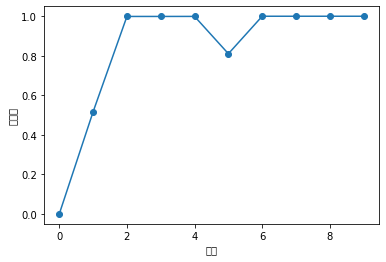

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
sys.path.append('../ch07')
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch08')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()


이 코드는 앞 장에서 본 '덧셈'의 학습용 코드와 거의 같음.

다른 점은 학습 데이터가 날짜 데이터라는 것, 그리고 모델로 AttentionSeq2seq를 사용한다는 점임.

Reverse도 적용하였음